In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

,MANAGER,PRACTITIONER,MONTH,AMOUNT,LOB
0,0,0,11,29.0,MARKETING
1,0,0,10,29.0,MARKETING
2,0,0,12,28.0,MARKETING
3,0,1,1,19.0,PFS
4,0,1,2,19.0,PFS


In [49]:
df.shape

(591, 5)

In [21]:
df.groupby('MONTH').sum()

,MANAGER,PRACTITIONER,AMOUNT
MONTH,,,
1,10,23,2077.154000
2,10,19,2156.058000
3,11,18,2221.328000
4,12,20,2232.757000
5,10,19,2088.711000
6,10,18,1910.392000
7,8,19,1904.683667
8,8,19,1669.493667
9,8,18,1533.367667


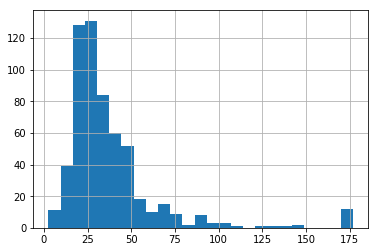

In [50]:
hist = df['AMOUNT'].hist(bins=25)

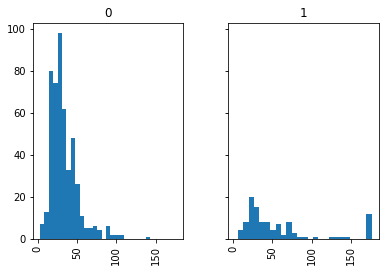

In [51]:
hist = df.hist(by='MANAGER', column='AMOUNT', bins=25, sharey=True, sharex=True)

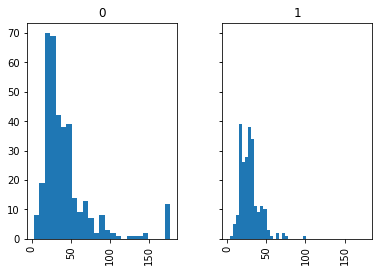

In [53]:
hist = df.hist(by='PRACTITIONER', column='AMOUNT', bins=25, sharey=True, sharex=True)

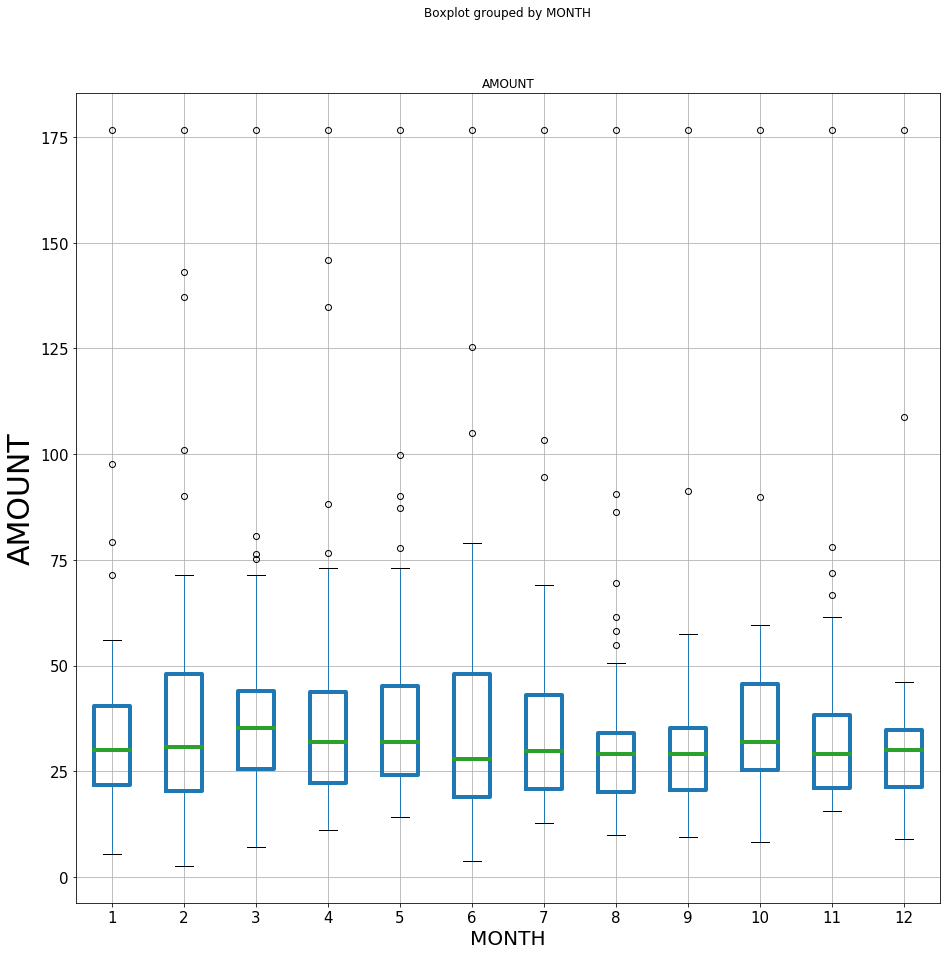

In [33]:
fig = plt.figure(figsize = (15,15))
plt.xlabel('MONTH', size = 20)
plt.ylabel('AMOUNT', size = 30)
plt.title('BOXPLOT - INVOICE AMOUNT GROUPED BY MONTH', size = 40)
plt.xticks(size = 15)
plt.yticks(size = 15)
ax = fig.gca()
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
hist = df.boxplot(by='MONTH', column='AMOUNT', ax=ax, boxprops=boxprops, medianprops=medianprops)
plt.show()

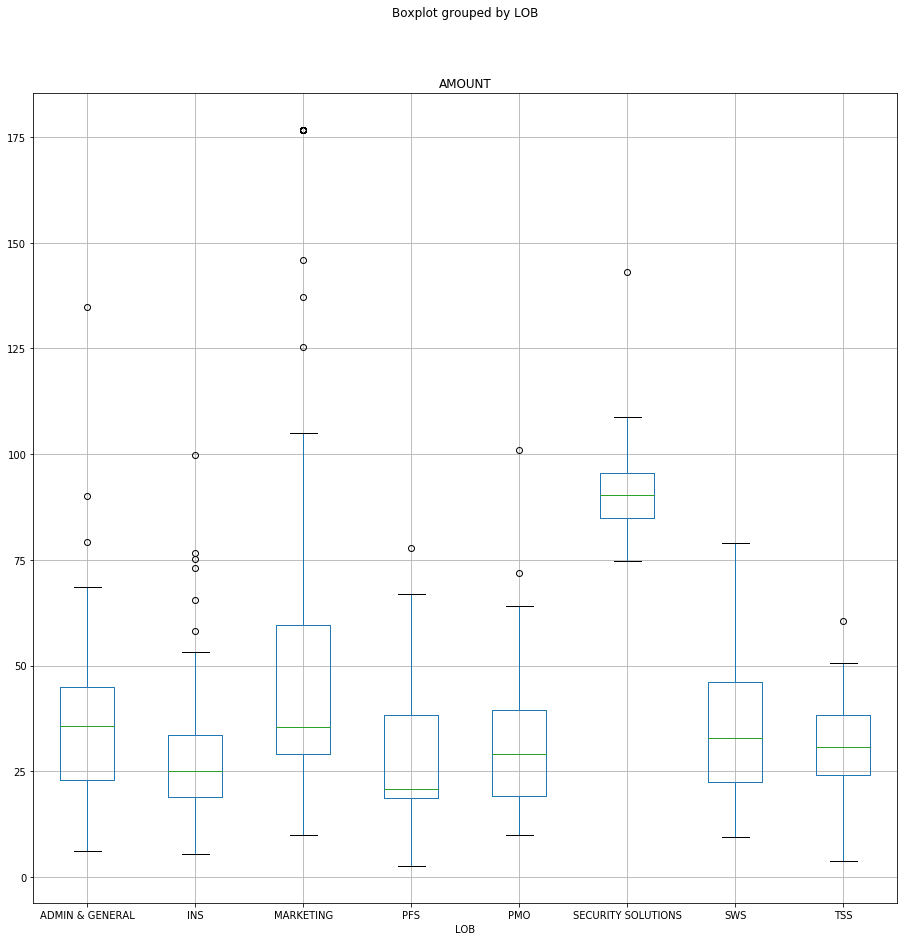

In [8]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
hist = df.boxplot(by='LOB', column='AMOUNT', ax=ax)

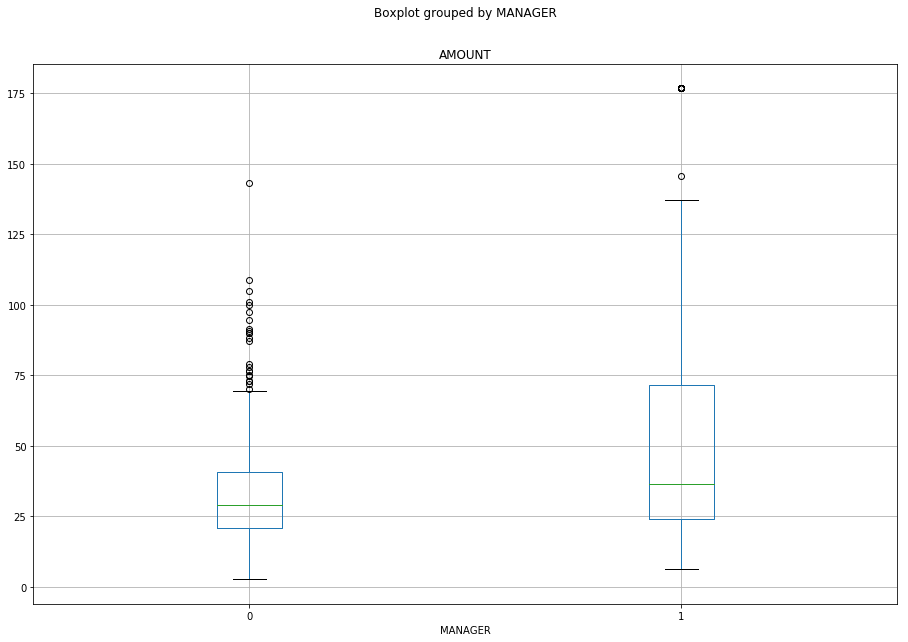

In [10]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
hist = df.boxplot(by='MANAGER', column='AMOUNT', ax=ax)

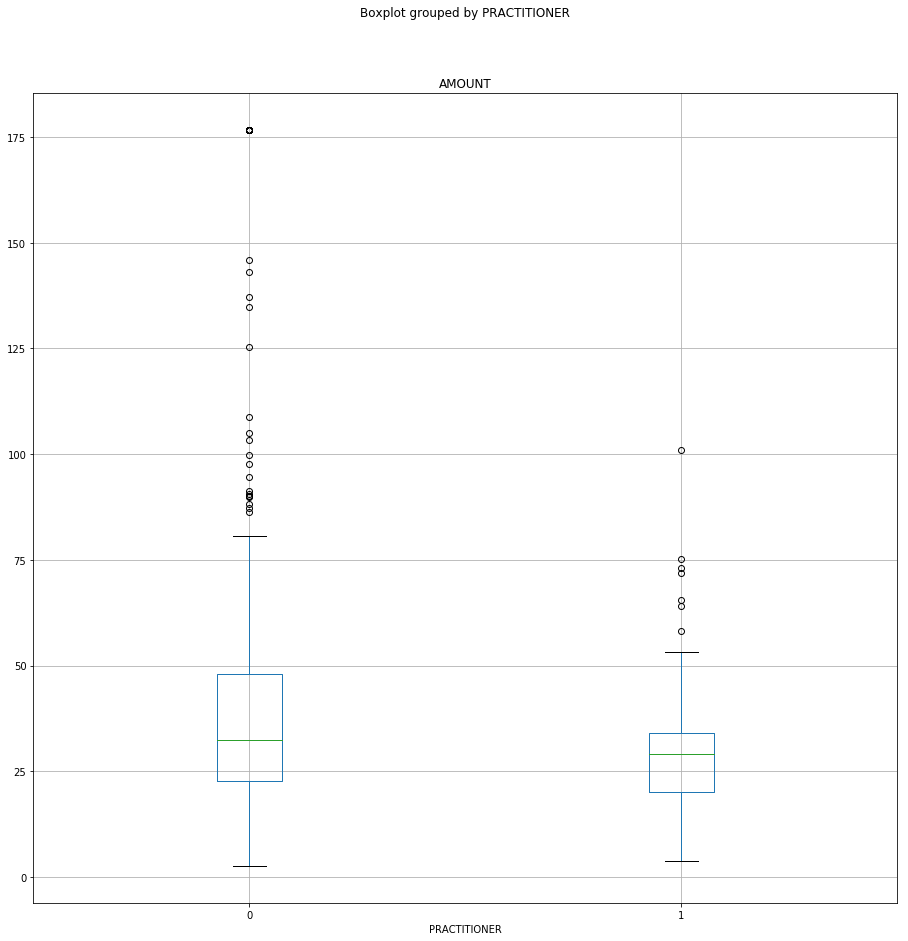

In [11]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
hist = df.boxplot(by='PRACTITIONER', column='AMOUNT', ax=ax)

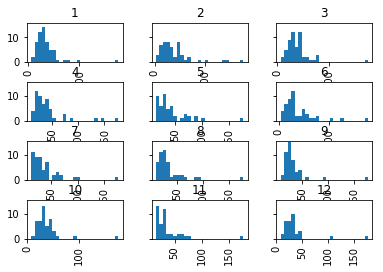

In [54]:
hist = df.hist(by='MONTH', column='AMOUNT', bins=25, sharey=True)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/plotting/_core.py:2164: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


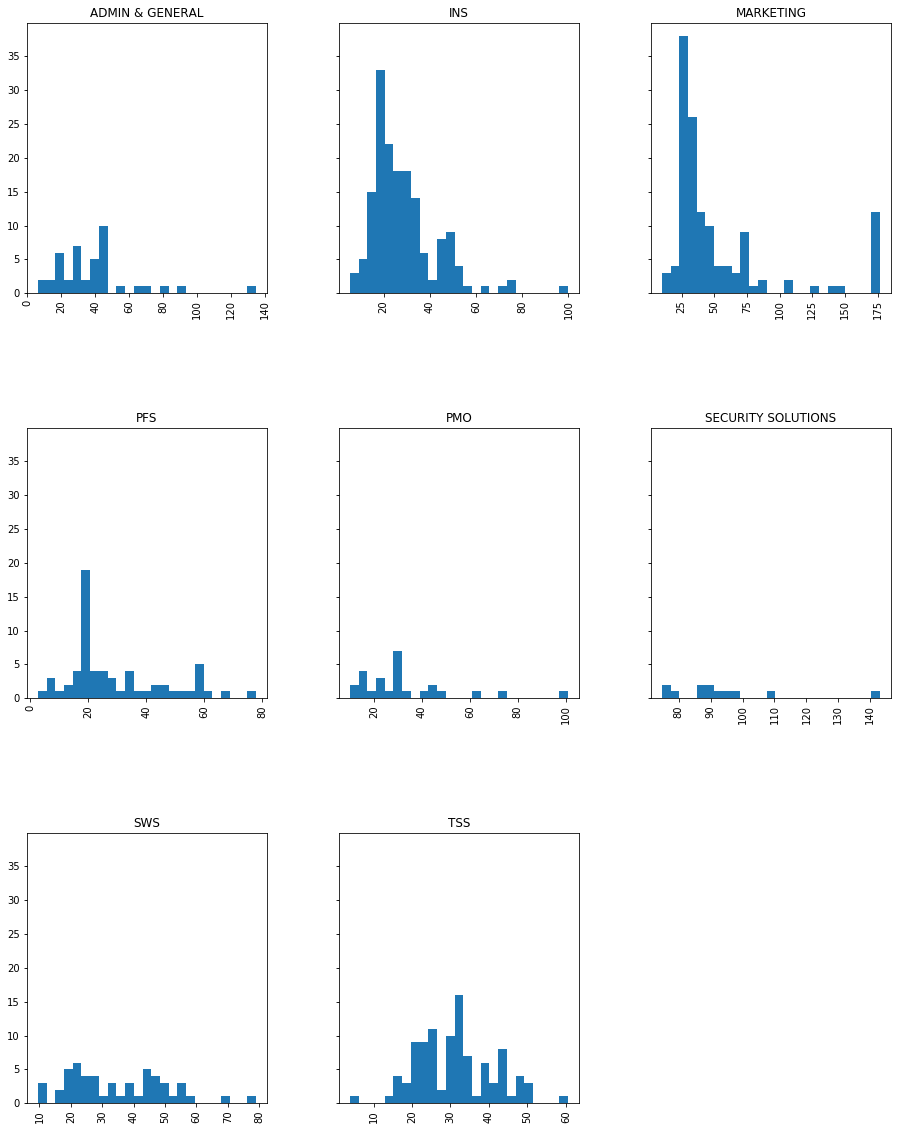

In [63]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hist = df.hist(by='LOB', column='AMOUNT', bins=25, sharey=True, ax=ax)

In [22]:
Feature = df
Feature = pd.concat([Feature,pd.get_dummies(df['LOB'])], axis=1)
del Feature['LOB']
# Feature.head()
Feature.describe()

,MANAGER,PRACTITIONER,MONTH,AMOUNT,ADMIN & GENERAL,INS,MARKETING,PFS,PMO,SECURITY SOLUTIONS,SWS,TSS
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,0.179357,0.389171,6.084602,37.700623,0.071066,0.275804,0.225042,0.106599,0.043993,0.020305,0.087986,0.169205
std,0.383976,0.487975,3.385855,28.238504,0.257153,0.447297,0.417964,0.308864,0.205254,0.141160,0.283515,0.375250
min,0.000000,0.000000,1.000000,2.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,21.615000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,6.000000,29.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,9.000000,43.732000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,12.000000,176.742667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
Feature.groupby('MONTH').sum()

,MANAGER,PRACTITIONER,AMOUNT,ADMIN & GENERAL,INS,MARKETING,PFS,PMO,SECURITY SOLUTIONS,SWS,TSS
MONTH,,,,,,,,,,,
1,10,23,2077.154000,4,15,11,10,2,1,4,12
2,10,19,2156.058000,4,13,12,8,2,1,3,10
3,11,18,2221.328000,4,15,12,8,2,1,5,9
4,12,20,2232.757000,4,16,14,5,2,1,5,8
5,10,19,2088.711000,3,14,13,5,2,1,5,7
6,10,18,1910.392000,4,12,14,6,2,1,5,7
7,8,19,1904.683667,5,14,11,6,2,1,4,7
8,8,19,1669.493667,4,14,10,5,2,1,5,7
9,8,18,1533.367667,2,14,10,3,2,1,6,8


In [78]:
msk = np.random.rand(len(df)) < 0.8
train = Feature[msk]
test = Feature[~msk]
predictors = ['ADMIN & GENERAL', 'INS', 'MARKETING', 'PFS', 'PMO', 'SECURITY SOLUTIONS', 'SWS', 'TSS']
# predictors = ['MANAGER', 'PRACTITIONER', 'MONTH']
target = ['AMOUNT']

In [56]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[predictors])
y = np.asanyarray(train[target])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ -0.07462576 -13.7719464   11.63925136 -12.1486514  -10.62447672
   45.1954072   -7.21274487 -13.0022134 ]]


In [57]:
y_hat= regr.predict(test[predictors])
x = np.asanyarray(test[predictors])
y = np.asanyarray(test[target])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 626.58
Variance score: 0.23


In [79]:
for i in range(len(predictors)):
    regr = linear_model.LinearRegression()
    x = np.asanyarray(train[predictors[i:i+1] + ['PRACTITIONER']])
    y = np.asanyarray(train[target])
    regr.fit (x, y)
    # The coefficients
    print ('Coefficients: ', regr.coef_, 'for predictor', predictors[i])
    
    y_hat= regr.predict(test[predictors[i:i+1] + ['PRACTITIONER']])
    x = np.asanyarray(test[predictors[i:i+1] + ['PRACTITIONER']])
    y = np.asanyarray(test[target])
    print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ -8.22704552 -14.32931218]] for predictor ADMIN & GENERAL
Residual sum of squares: 990.34
Variance score: 0.04
Coefficients:  [[ -7.09790488 -10.70951826]] for predictor INS
Residual sum of squares: 964.00
Variance score: 0.06
Coefficients:  [[ 18.16431115  -6.85557268]] for predictor MARKETING
Residual sum of squares: 917.30
Variance score: 0.11
Coefficients:  [[-13.17179547 -14.87067702]] for predictor PFS
Residual sum of squares: 954.45
Variance score: 0.07
Coefficients:  [[  6.549375   -14.04312406]] for predictor PMO
Residual sum of squares: 984.66
Variance score: 0.04
Coefficients:  [[ 51.39368783 -11.50577883]] for predictor SECURITY SOLUTIONS
Residual sum of squares: 932.44
Variance score: 0.09
Coefficients:  [[ -5.78103388 -13.65422593]] for predictor SWS
Residual sum of squares: 978.64
Variance score: 0.05
Coefficients:  [[ -3.54360877 -12.56232955]] for predictor TSS
Residual sum of squares: 977.71
Variance score: 0.05
